In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel,roberts, scharr, prewitt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import xarray as xr



In [3]:
#Resize images to
SIZE = 128

#Capturing images and labels into arrays.
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        img = cv2.resize(img, (SIZE, SIZE)) #Resizing images
        train_images.append(img)
        train_labels.append(label)

    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        img = cv2.resize(img, (SIZE, SIZE)) 
        train_images.append(img)
        train_labels.append(label)

    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

minor
moderate
severe


In [4]:
#Resize images to
SIZE = 128

#Capturing images and labels into arrays.
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resizing images
        train_images.append(img)
        train_labels.append(label)

        
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE)) 
        train_images.append(img)
        train_labels.append(label)

    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

minor
moderate
severe


In [5]:
img.shape

(128, 128)

In [6]:
#Test images
test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/validation/*"):
    test_label = directory_path.split("-")[-1]
    print(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

minor
severe
moderate


In [7]:
train_images.shape,train_labels.shape

((1383, 128, 128), (1383,))

In [8]:
test_images.shape,test_labels.shape

((248, 128, 128), (248,))

In [9]:
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
# Normalizing pixel values to between 0 and 1
# x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
#Spliting data into train, validation and test datasets 
x_train, x_val,y_train, y_val = train_test_split(train_images, train_labels_encoded, test_size=0.2, random_state=1)
x_test, y_test = test_images, test_labels_encoded


In [12]:
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((1106, 128, 128), (1106,), (277, 128, 128), (277,), (248, 128, 128), (248,))

In [25]:
df = pd.DataFrame(
                       x_train.reshape((-1, x_train.shape[-1])), 
                       index= pd.MultiIndex.from_product(
                          [range(x_train.shape[0]), range(x_train.shape[1])]
                          )
                      ).to_csv('/content/sample_data_x_train.csv')

In [31]:
# df = pd.DataFrame(
#                        y_train.reshape((-1, y_train.shape[-1])), 
#                        index= pd.MultiIndex.from_product(
#                           [range(y_train.shape[0]), range(y_train.shape[1])]
#                           )
#                       ).to_csv('/content/sample_data_y_train.csv')

df = pd.DataFrame(y_train)
df.to_csv('/content/sample_data_y_train.csv', index=False)  


In [27]:
df = pd.DataFrame(
                       x_val.reshape((-1, x_val.shape[-1])), 
                       index= pd.MultiIndex.from_product(
                          [range(x_val.shape[0]), range(x_val.shape[1])]
                          )
                      ).to_csv('/content/sample_data_x_val.csv')

In [32]:
# df = pd.DataFrame(
#                        y_val.reshape((-1, y_val.shape[-1])), 
#                        index= pd.MultiIndex.from_product(
#                           [range(y_val.shape[0]), range(y_val.shape[1])]
#                           )
#                       ).to_csv('/content/sample_data_y_val.csv')

df = pd.DataFrame(y_val)
df.to_csv('/content/sample_data_y_val.csv', index=False)  


In [29]:
df = pd.DataFrame(
                       x_test.reshape((-1, x_test.shape[-1])), 
                       index= pd.MultiIndex.from_product(
                          [range(x_test.shape[0]), range(x_test.shape[1])]
                          )
                      ).to_csv('/content/sample_data_x_test.csv')

In [33]:
# df = pd.DataFrame(
#                        y_test.reshape((-1, y_test.shape[-1])), 
#                        index= pd.MultiIndex.from_product(
#                           [range(y_test.shape[0]), range(y_test.shape[1])]
#                           )
#                       ).to_csv('/content/sample_data_y_test.csv')

df = pd.DataFrame(y_test)
df.to_csv('/content/sample_data_y_test.csv', index=False)  


In [36]:
# df = pd.read_csv('/content/sample_data/sample_data_x_train.csv', header=None, index_col=[0,1])
# np.array(df.agg(list, 1).groupby(level=0).agg(list).tolist())

In [37]:
###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
                
         #Full image
        #GLCM = graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = graycomatrix(img, [1], [0])       
        GLCM_Energy = graycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = graycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = graycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = graycomatrix(img, [3], [0])       
        GLCM_Energy2 = graycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = graycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = graycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = graycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = graycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = graycomatrix(img, [5], [0])       
        GLCM_Energy3 = graycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = graycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = graycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = graycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = graycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = graycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = graycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = graycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = graycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = graycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = graycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = graycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = graycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = graycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = graycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = graycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = graycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset= pd.concat([image_dataset, df], axis=0)
        
    return image_dataset

In [67]:
#Extract features from training images
image_features = feature_extractor(x_train)
X_for_ML_GLCM =image_features
X_for_ML_GLCM.shape

(1106, 25)

In [40]:
X_for_ML_GLCM.to_csv('/content/sample_data_X_for_ML_GLCM.csv', index=False)  

In [41]:
X_for_ML_GLCM = pd.read_csv('/content/sample_data/sample_data_X_for_ML_GLCM.csv')

In [66]:
X_for_ML_GLCM.shape

(1106, 25)

In [42]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [81]:
#Can also use SVM but RF is faster and may be more accurate.
# from sklearn import svm
# SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification


# Fit the model on training data
RF_model.fit(X_for_ML_GLCM.values, y_train) #For sklearn no one hot encoding
# SVM_model.fit(X_for_RF, y_train)



RandomForestClassifier(n_estimators=50, random_state=42)

In [83]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
val_features = feature_extractor(x_val)
val_features = np.expand_dims(val_features, axis=0)
val_for_RF = np.reshape(val_features, (x_val.shape[0], -1))

In [79]:
type(val_for_RF), type(val_features)

(numpy.ndarray, numpy.ndarray)

In [84]:
#Predict on test
val_prediction_RF = RF_model.predict(val_for_RF)
#Inverse le transform to get original label back. 
val_prediction_RF = le.inverse_transform(val_prediction_RF)

In [85]:
y_val_labels= le.inverse_transform(y_val)

In [86]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_RF))

Accuracy =  0.5054151624548736


<Axes: >

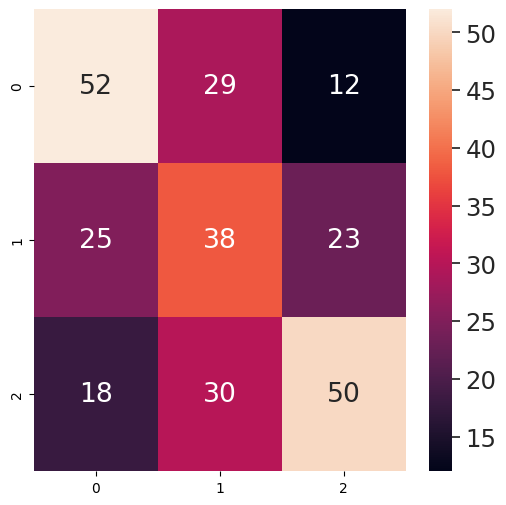

In [87]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val_labels, val_prediction_RF)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

In [88]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #Iterating through each file 
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        
        input_img = x_train[image, :,:]
        img = input_img

         # FEATURE 1 - Pixel values         
        #Adding pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values  
        #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []  #Create empty list to hold all kernels that we will generate in a loop
        for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with values of 1 and 3
                for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
                    for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                                  
                        gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
                        ksize=9
                        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                        kernels.append(kernel)
                        #Now filter the image and add values to a new column 
                        fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                        filtered_img = fimg.reshape(-1)
                        df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                        num += 1  #Increment for gabor column label
        
        #Append features from current image to the dataset
        image_dataset= pd.concat([image_dataset, df], axis=0)
        
    return image_dataset

In [89]:
# Normalizing pixel values to between 0 and 1
x_train,x_val = x_train / 255.0,x_val / 255.0

In [90]:
#Extracting features
image_features = feature_extractor(x_train)

In [91]:
image_features.shape

(18120704, 33)

In [92]:
#Reshaping to a vector for ML training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF_GABOR = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features

In [93]:
X_for_RF_GABOR.shape

(1106, 540672)

In [ ]:
df=pd.DataFrame(X_for_RF_GABOR)
df.to_csv('/content/sample_data_X_for_RF_GABOR1.csv', index=False)

In [97]:
X_for_ML_GLCM = pd.read_csv('/content/sample_data/sample_data_X_for_RF_GABOR.csv')

FileNotFoundError: ignored

In [ ]:
# Fit the model on training data
RF_model.fit(X_for_RF_GABOR.values, y_train) #For sklearn no one hot encoding

In [ ]:
df.to_csv('/content/sample_data.csv', index=False)  

